#üìå Extracci√≥n y Normalizaci√≥n




In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df_crudo = pd.read_json('TelecomX_Data.json')

# Normalizar los campos JSON anidados
df_clientes = pd.json_normalize(df_crudo['customer'])
df_telefono = pd.json_normalize(df_crudo['phone'])
df_internet = pd.json_normalize(df_crudo['internet'])
df_cuenta = pd.json_normalize(df_crudo['account'])





df_base = df_crudo[['customerID', 'Churn']].reset_index(drop=True)
df_clientes = df_clientes.reset_index(drop=True)
df_telefono = df_telefono.reset_index(drop=True)
df_internet = df_internet.reset_index(drop=True)
df_cuenta = df_cuenta.reset_index(drop=True)

# Concatenar todos los DataFrames
df_final = pd.concat([df_base, df_clientes, df_telefono, df_internet, df_cuenta], axis=1)


# Renombrar columnas a espa√±ol
df_final.rename(columns={
    'customerID': 'ID_Cliente',
    'gender': 'Genero',
    'SeniorCitizen': 'Adulto_Mayor',
    'Partner': 'Pareja',
    'Dependents': 'Dependientes',
    'tenure': 'Meses_Contrato',
    'PhoneService': 'Servicio_Telefonico',
    'MultipleLines': 'Multiples_Lineas',
    'InternetService': 'Servicio_Internet',
    'OnlineSecurity': 'Seguridad_Online',
    'OnlineBackup': 'Respaldo_Online',
    'DeviceProtection': 'Proteccion_Dispositivo',
    'TechSupport': 'Soporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Peliculas',
    'Contract': 'Tipo_Contrato',
    'PaperlessBilling': 'Facturacion_Electronica',
    'PaymentMethod': 'Metodo_Pago',
    'Charges.Monthly': 'Cargos_Mensuales',
    'Charges.Total': 'Cargos_Totales'
}, inplace=True)



print(df_final.head())
print(df_final.columns)

   ID_Cliente Churn  Genero  Adulto_Mayor Pareja Dependientes  Meses_Contrato  \
0  0002-ORFBO    No  Female             0    Yes          Yes               9   
1  0003-MKNFE    No    Male             0     No           No               9   
2  0004-TLHLJ   Yes    Male             0     No           No               4   
3  0011-IGKFF   Yes    Male             1    Yes           No              13   
4  0013-EXCHZ   Yes  Female             1    Yes           No               3   

  Servicio_Telefonico Multiples_Lineas Servicio_Internet  ... Respaldo_Online  \
0                 Yes               No               DSL  ...             Yes   
1                 Yes              Yes               DSL  ...              No   
2                 Yes               No       Fiber optic  ...              No   
3                 Yes               No       Fiber optic  ...             Yes   
4                 Yes               No       Fiber optic  ...              No   

  Proteccion_Dispositivo S

# üîß Transformaci√≥n

**Limpieza de datos y creaci√≥n columna Cuentas_Diarias**

In [24]:
df_final['Cargos_Totales'] = pd.to_numeric(df_final['Cargos_Totales'], errors='coerce')
df_final.loc[df_final['Meses_Contrato'] == 0, 'Cargos_Totales'] = 0
df_final.dropna(subset=['Cargos_Totales', 'Churn'], inplace=True)

#'Cuentas_Diarias'
dias_en_mes = 30
df_final['Cuentas_Diarias'] = df_final['Cargos_Mensuales'] / dias_en_mes

**Churn S√≠ / No**

In [43]:
print("\n--- Valores √∫nicos de 'Churn' ANTES del mapeo ---")
print(df_final['Churn'].unique())

print("---  Valores √∫nicos de 'Churn' DESPU√âS del mapeo ---")
print(df_final['Churn'].unique())

df_final = df_final[df_final['Churn'] != ''].copy()
print(df_final['Churn'].unique())


--- Valores √∫nicos de 'Churn' ANTES del mapeo ---
['No' 'Yes']
---  Valores √∫nicos de 'Churn' DESPU√âS del mapeo ---
['No' 'Yes']
['No' 'Yes']


**Traducci√≥n G√©nero**

In [44]:
print("\n--- Valores √∫nicos de 'Genero' ANTES del mapeo ---")
print(df_final['Genero'].unique())
df_final['Genero'] = df_final['Genero'].map({'Female': 'Femenino', 'Male': 'Masculino'})
print("---  Valores √∫nicos de 'Genero' DESPU√âS del mapeo ---")
print(df_final['Genero'].unique())


--- Valores √∫nicos de 'Genero' ANTES del mapeo ---
['Female' 'Male']
---  Valores √∫nicos de 'Genero' DESPU√âS del mapeo ---
['Femenino' 'Masculino']


**Verificaci√≥n Cuentas_Diarias**

In [45]:
dias_en_mes = 30
df_final['Cuentas_Diarias'] = df_final['Cargos_Mensuales'] / dias_en_mes

print(df_final['Cuentas_Diarias'].head())
print(df_final.columns)

0    2.186667
1    1.996667
2    2.463333
3    3.266667
4    2.796667
Name: Cuentas_Diarias, dtype: float64
Index(['ID_Cliente', 'Churn', 'Genero', 'Adulto_Mayor', 'Pareja',
       'Dependientes', 'Meses_Contrato', 'Servicio_Telefonico',
       'Multiples_Lineas', 'Servicio_Internet', 'Seguridad_Online',
       'Respaldo_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico',
       'Streaming_TV', 'Streaming_Peliculas', 'Tipo_Contrato',
       'Facturacion_Electronica', 'Metodo_Pago', 'Cargos_Mensuales',
       'Cargos_Totales', 'Cuentas_Diarias'],
      dtype='object')


**Traducci√≥n otras categor√≠as binarias**

In [46]:
binary_map = {'Yes': 'S√≠', 'No': 'No'}

cols_to_map_binary_missing = ['Pareja', 'Dependientes', 'Servicio_Telefonico', 'Facturacion_Electronica']
for col in cols_to_map_binary_missing:
    print(f"\n--- Valores √∫nicos de '{col}' ANTES del mapeo (binario) ---")
    print(df_final[col].unique())
    df_final[col] = df_final[col].map(binary_map)
    print(f"---  Valores √∫nicos de '{col}' DESPU√âS del mapeo (binario) ---")
    print(df_final[col].unique())


--- Valores √∫nicos de 'Pareja' ANTES del mapeo (binario) ---
['Yes' 'No']
---  Valores √∫nicos de 'Pareja' DESPU√âS del mapeo (binario) ---
['S√≠' 'No']

--- Valores √∫nicos de 'Dependientes' ANTES del mapeo (binario) ---
['Yes' 'No']
---  Valores √∫nicos de 'Dependientes' DESPU√âS del mapeo (binario) ---
['S√≠' 'No']

--- Valores √∫nicos de 'Servicio_Telefonico' ANTES del mapeo (binario) ---
['Yes' 'No']
---  Valores √∫nicos de 'Servicio_Telefonico' DESPU√âS del mapeo (binario) ---
['S√≠' 'No']

--- Valores √∫nicos de 'Facturacion_Electronica' ANTES del mapeo (binario) ---
['Yes' 'No']
---  Valores √∫nicos de 'Facturacion_Electronica' DESPU√âS del mapeo (binario) ---
['S√≠' 'No']


##**Estandarizaci√≥n valores**

**Adulto Mayor de Booleano a S√≠ / No**

In [47]:
print("\n--- Valores √∫nicos de 'Adulto_Mayor' ANTES del mapeo ---")
print(df_final['Adulto_Mayor'].unique())
df_final['Adulto_Mayor'] = df_final['Adulto_Mayor'].map({0: 'No', 1: 'S√≠'}) # Removed .fillna('Desconocido')
print("--- Valores √∫nicos de 'Adulto_Mayor' DESPU√âS del mapeo ---")
print(df_final['Adulto_Mayor'].unique())


--- Valores √∫nicos de 'Adulto_Mayor' ANTES del mapeo ---
[0 1]
--- Valores √∫nicos de 'Adulto_Mayor' DESPU√âS del mapeo ---
['No' 'S√≠']


**Traducci√≥n No phone / internet service**

In [48]:
print("\n---  Valores √∫nicos de 'Multiples_Lineas' ANTES del mapeo ---")
print(df_final['Multiples_Lineas'].unique())
df_final['Multiples_Lineas'] = df_final['Multiples_Lineas'].map({'No phone service': 'Sin Servicio Telef√≥nico', 'No': 'No', 'Yes': 'S√≠'})
print("---  Valores √∫nicos de 'Multiples_Lineas' DESPU√âS del mapeo ---")
print(df_final['Multiples_Lineas'].unique())

internet_service_cols = ['Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas']
for col in internet_service_cols:
    print(f"\n--- Valores √∫nicos de '{col}' ANTES del mapeo (servicio internet) ---")
    print(df_final[col].unique())
    df_final[col] = df_final[col].map({'No internet service': 'Sin Servicio de Internet', 'No': 'No', 'Yes': 'S√≠'})
    print(f"---  Valores √∫nicos de '{col}' DESPU√âS del mapeo (servicio internet) ---")
    print(df_final[col].unique())



---  Valores √∫nicos de 'Multiples_Lineas' ANTES del mapeo ---
['No' 'Yes' 'No phone service']
---  Valores √∫nicos de 'Multiples_Lineas' DESPU√âS del mapeo ---
['No' 'S√≠' 'Sin Servicio Telef√≥nico']

--- Valores √∫nicos de 'Seguridad_Online' ANTES del mapeo (servicio internet) ---
['No' 'Yes' 'No internet service']
---  Valores √∫nicos de 'Seguridad_Online' DESPU√âS del mapeo (servicio internet) ---
['No' 'S√≠' 'Sin Servicio de Internet']

--- Valores √∫nicos de 'Respaldo_Online' ANTES del mapeo (servicio internet) ---
['Yes' 'No' 'No internet service']
---  Valores √∫nicos de 'Respaldo_Online' DESPU√âS del mapeo (servicio internet) ---
['S√≠' 'No' 'Sin Servicio de Internet']

--- Valores √∫nicos de 'Proteccion_Dispositivo' ANTES del mapeo (servicio internet) ---
['No' 'Yes' 'No internet service']
---  Valores √∫nicos de 'Proteccion_Dispositivo' DESPU√âS del mapeo (servicio internet) ---
['No' 'S√≠' 'Sin Servicio de Internet']

--- Valores √∫nicos de 'Soporte_Tecnico' ANTES del mape

**Servicios de Internet**

In [49]:
print("\n---  Valores √∫nicos de 'Servicio_Internet' ANTES del mapeo ---")
print(df_final['Servicio_Internet'].unique())
df_final['Servicio_Internet'] = df_final['Servicio_Internet'].map({
    'DSL': 'DSL',
    'Fiber optic': 'Fibra √ìptica',
    'No': 'Sin Servicio de Internet'
})
print("---  Valores √∫nicos de 'Servicio_Internet' DESPU√âS del mapeo ---")
print(df_final['Servicio_Internet'].unique())


---  Valores √∫nicos de 'Servicio_Internet' ANTES del mapeo ---
['DSL' 'Fiber optic' 'No']
---  Valores √∫nicos de 'Servicio_Internet' DESPU√âS del mapeo ---
['DSL' 'Fibra √ìptica' 'Sin Servicio de Internet']


**Traducci√≥n Tipo de Contrato**

In [50]:
print("\n---  Valores √∫nicos de 'Tipo_Contrato' ANTES del mapeo ---")
print(df_final['Tipo_Contrato'].unique())
df_final['Tipo_Contrato'] = df_final['Tipo_Contrato'].map({
    'Month-to-month': 'Mes a Mes',
    'One year': 'Un A√±o',
    'Two year': 'Dos A√±os'
}) # Removed .fillna('Desconocido')
print("---  Valores √∫nicos de 'Tipo_Contrato' DESPU√âS del mapeo ---")
print(df_final['Tipo_Contrato'].unique())
print("---  Conteo de valores de 'Tipo_Contrato' DESPU√âS del mapeo ---")
print(df_final['Tipo_Contrato'].value_counts(dropna=False))


---  Valores √∫nicos de 'Tipo_Contrato' ANTES del mapeo ---
['One year' 'Month-to-month' 'Two year']
---  Valores √∫nicos de 'Tipo_Contrato' DESPU√âS del mapeo ---
['Un A√±o' 'Mes a Mes' 'Dos A√±os']
---  Conteo de valores de 'Tipo_Contrato' DESPU√âS del mapeo ---
Tipo_Contrato
Mes a Mes    3875
Dos A√±os     1695
Un A√±o       1473
Name: count, dtype: int64


**Traducci√≥n M√©todo de Pago**

In [51]:
print("\n---  Valores √∫nicos de 'Metodo_Pago' ANTES del mapeo ---")
print(df_final['Metodo_Pago'].unique())
df_final['Metodo_Pago'] = df_final['Metodo_Pago'].map({
    'Bank transfer (automatic)': 'Transferencia Bancaria (Autom√°tica)',
    'Credit card (automatic)': 'Tarjeta de Cr√©dito (Autom√°tica)',
    'Electronic check': 'Cheque Electr√≥nico',
    'Mailed check': 'Cheque por Correo'
})
print("--- Valores √∫nicos de 'Metodo_Pago' DESPU√âS del mapeo ---")
print(df_final['Metodo_Pago'].unique())
print("---  Conteo de valores de 'Metodo_Pago' DESPU√âS del mapeo ---")
print(df_final['Metodo_Pago'].value_counts(dropna=False))


---  Valores √∫nicos de 'Metodo_Pago' ANTES del mapeo ---
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
--- Valores √∫nicos de 'Metodo_Pago' DESPU√âS del mapeo ---
['Cheque por Correo' 'Cheque Electr√≥nico'
 'Tarjeta de Cr√©dito (Autom√°tica)' 'Transferencia Bancaria (Autom√°tica)']
---  Conteo de valores de 'Metodo_Pago' DESPU√âS del mapeo ---
Metodo_Pago
Cheque Electr√≥nico                     2365
Cheque por Correo                      1612
Transferencia Bancaria (Autom√°tica)    1544
Tarjeta de Cr√©dito (Autom√°tica)        1522
Name: count, dtype: int64


# üìä Carga y an√°lisis

**Distribucion Churn**


--- Distribuci√≥n de la Variable 'Churn' (Evasi√≥n) ---

Distribuci√≥n de Churn ('No': No Evasi√≥n, 'S√≠': Evasi√≥n):
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Porcentaje de Churn:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


/tmp/ipython-input-52-381586703.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_churn.index.map(translated_labels), y=conteo_churn.values, palette='viridis')


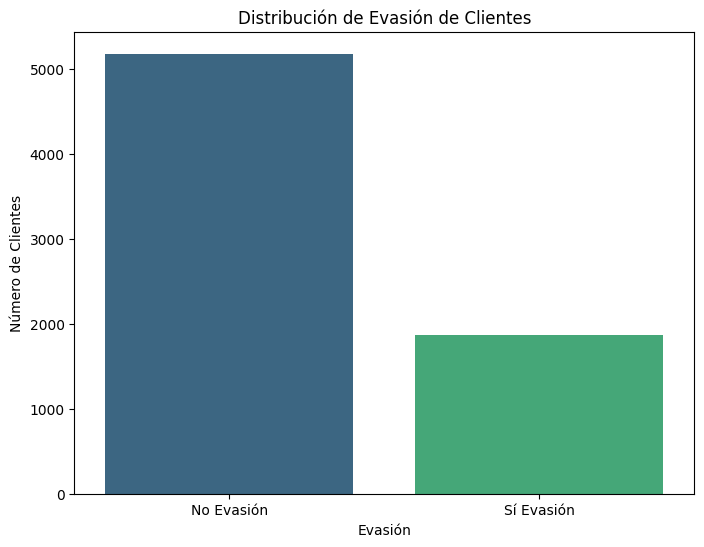

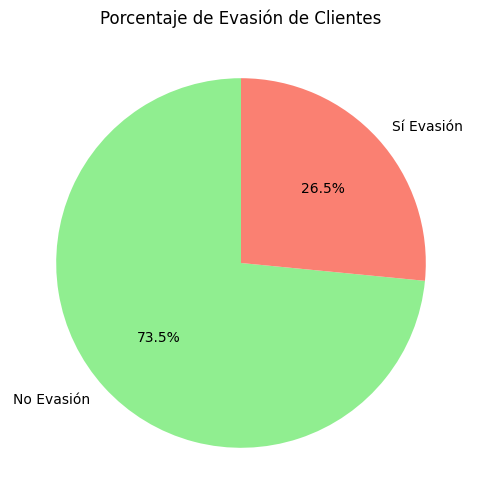

In [52]:
# --- 5. Distribuci√≥n de la Variable "Churn" (Evasi√≥n) ---
print("\n--- Distribuci√≥n de la Variable 'Churn' (Evasi√≥n) ---")

# Drop rows where 'Churn' is an empty string
df_final_cleaned = df_final[df_final['Churn'] != ''].copy()

conteo_churn = df_final_cleaned['Churn'].value_counts()
porcentaje_churn = df_final_cleaned['Churn'].value_counts(normalize=True) * 100

print("\nDistribuci√≥n de Churn ('No': No Evasi√≥n, 'S√≠': Evasi√≥n):")
print(conteo_churn)
print("\nPorcentaje de Churn:")
print(porcentaje_churn)

# Define translated labels
translated_labels = {'No': 'No Evasi√≥n', 'Yes': 'S√≠ Evasi√≥n'}

plt.figure(figsize=(8, 6))
# Use translated labels for the bar plot x-axis
sns.barplot(x=conteo_churn.index.map(translated_labels), y=conteo_churn.values, palette='viridis')
plt.title('Distribuci√≥n de Evasi√≥n de Clientes')
plt.xlabel('Evasi√≥n')
plt.ylabel('N√∫mero de Clientes')
plt.show()

plt.figure(figsize=(8, 6))
# Use translated labels for the pie chart
plt.pie(porcentaje_churn, labels=porcentaje_churn.index.map(translated_labels), autopct='%1.1f%%', colors=['lightgreen', 'salmon'], startangle=90)
plt.title('Porcentaje de Evasi√≥n de Clientes')
plt.show()

**Distribuci√≥n de la Evasi√≥n por categor√≠as**


--- Distribuci√≥n de la Evasi√≥n por Variables Categ√≥ricas ---

Porcentaje de Evasi√≥n por Genero:
Churn             No         S√≠
Genero                         
Femenino   73.079128  26.920872
Masculino  73.839662  26.160338


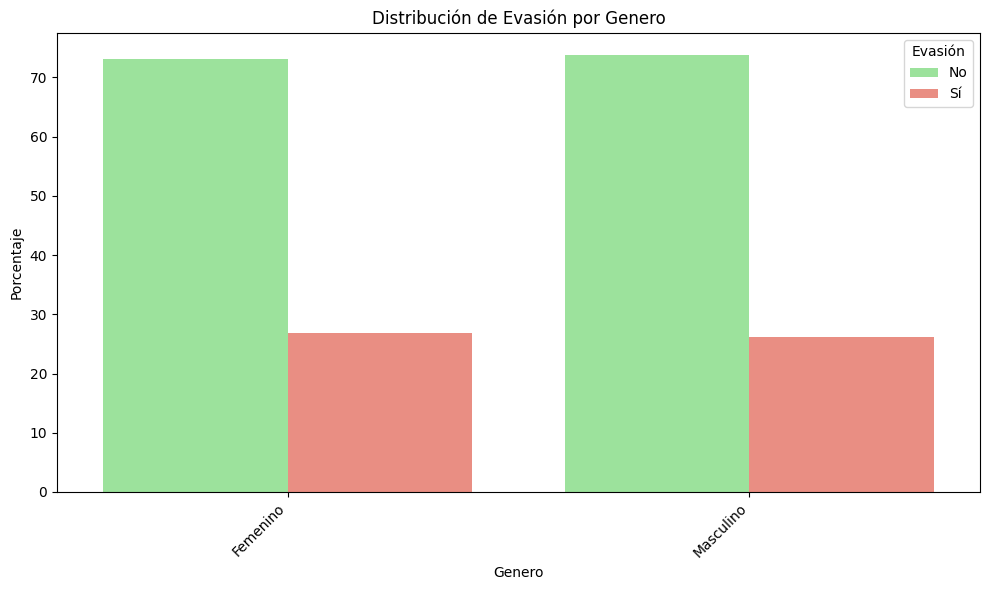


Porcentaje de Evasi√≥n por Adulto_Mayor:
Churn                No         S√≠
Adulto_Mayor                      
No            76.393832  23.606168
S√≠            58.318739  41.681261


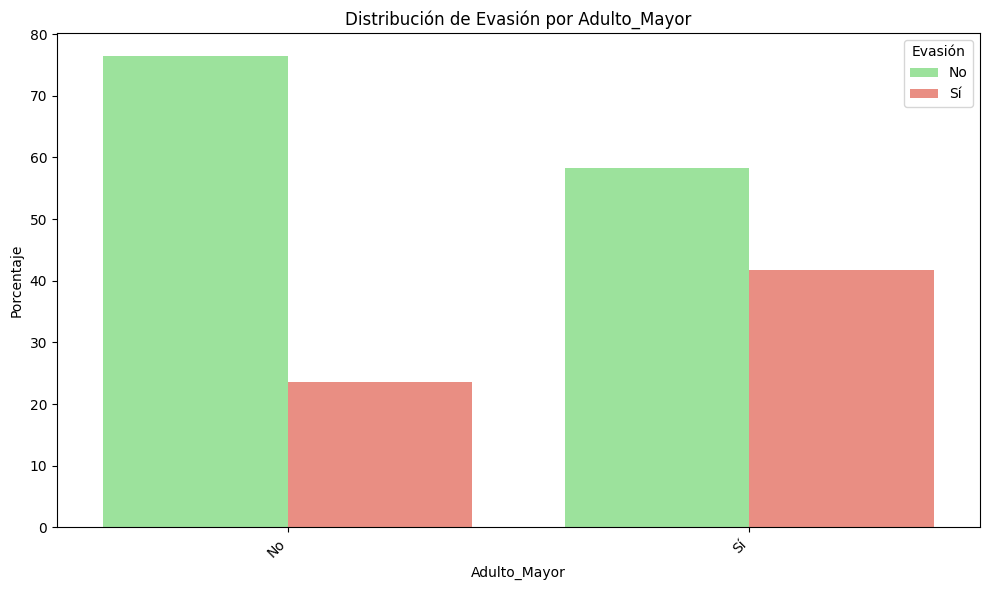


Porcentaje de Evasi√≥n por Pareja:
Churn          No         S√≠
Pareja                      
No      67.042021  32.957979
S√≠      80.335097  19.664903


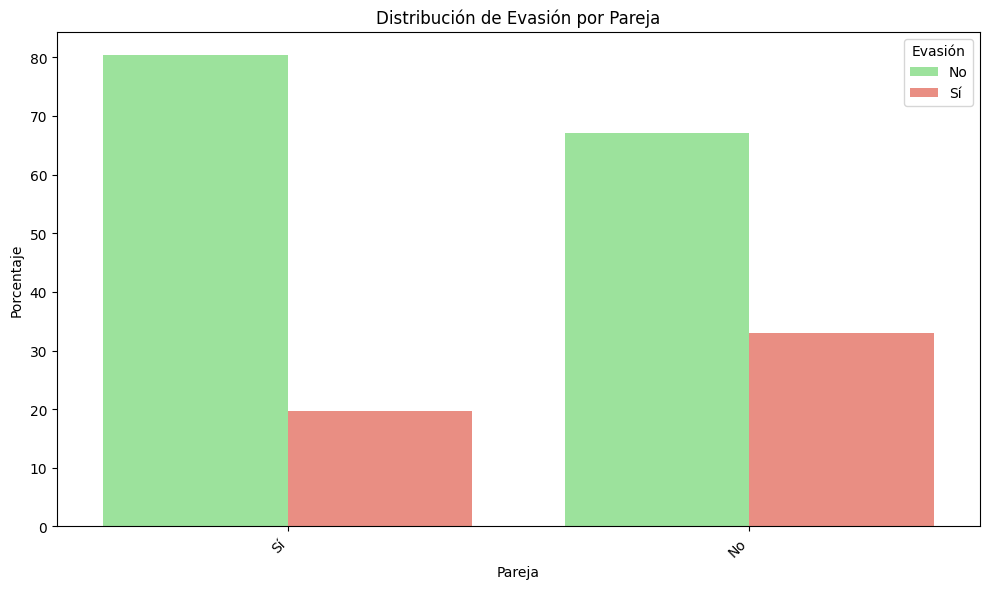


Porcentaje de Evasi√≥n por Dependientes:
Churn                No         S√≠
Dependientes                      
No            68.720860  31.279140
S√≠            84.549763  15.450237


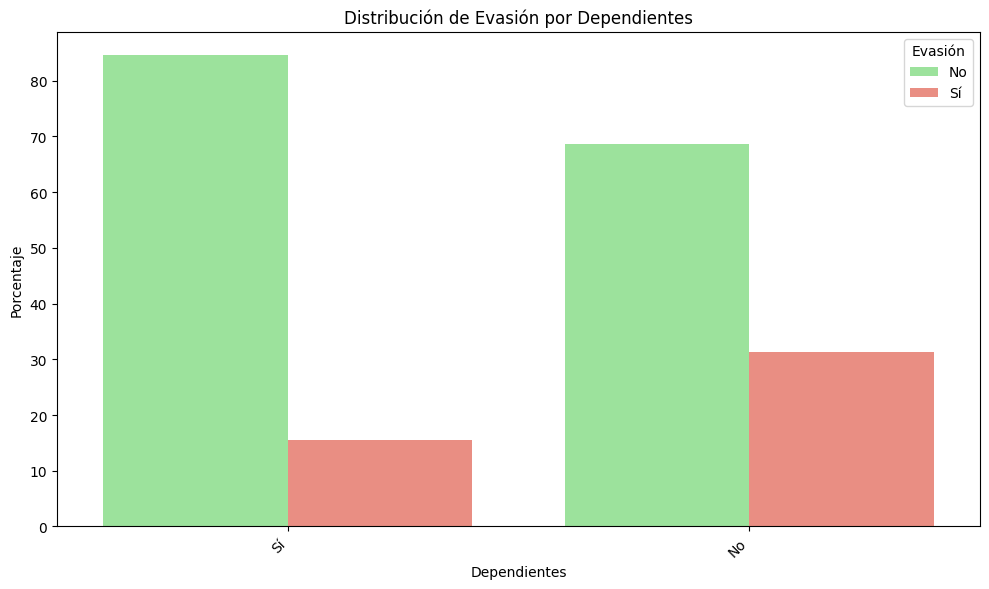


Porcentaje de Evasi√≥n por Servicio_Telefonico:
Churn                       No         S√≠
Servicio_Telefonico                      
No                   75.073314  24.926686
S√≠                   73.290363  26.709637


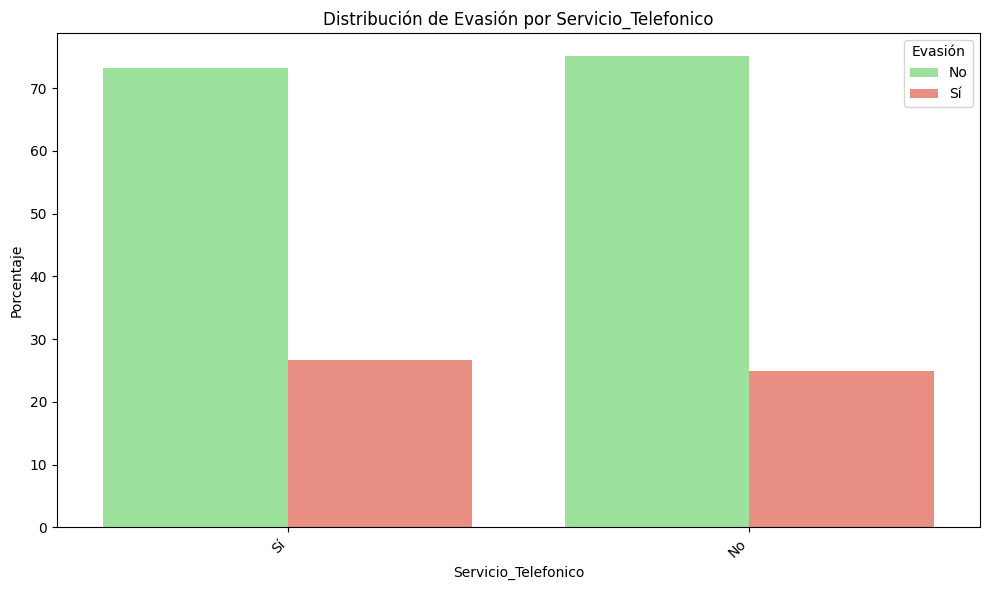


Porcentaje de Evasi√≥n por Multiples_Lineas:
Churn                           No         S√≠
Multiples_Lineas                             
No                       74.955752  25.044248
Sin Servicio Telef√≥nico  75.073314  24.926686
S√≠                       71.390104  28.609896


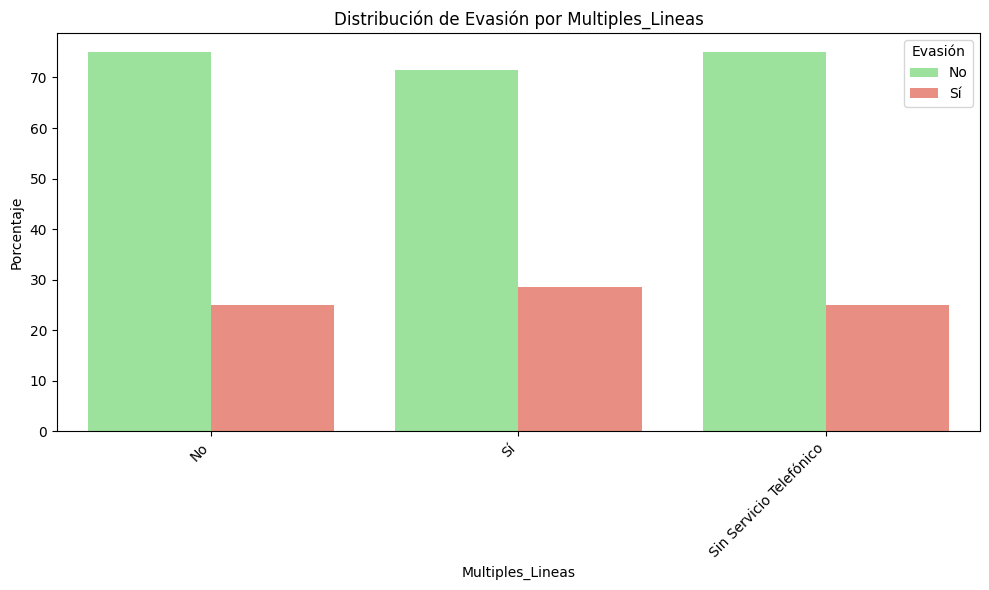


Porcentaje de Evasi√≥n por Servicio_Internet:
Churn                            No         S√≠
Servicio_Internet                             
DSL                       81.040892  18.959108
Fibra √ìptica              58.107235  41.892765
Sin Servicio de Internet  92.595020   7.404980


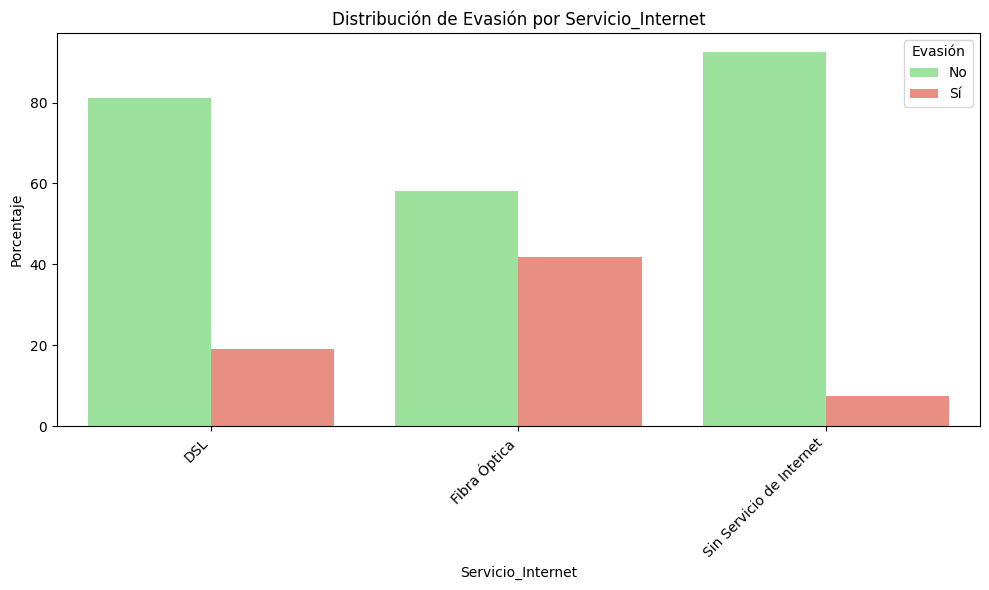


Porcentaje de Evasi√≥n por Seguridad_Online:
Churn                            No         S√≠
Seguridad_Online                              
No                        58.233276  41.766724
Sin Servicio de Internet  92.595020   7.404980
S√≠                        85.388806  14.611194


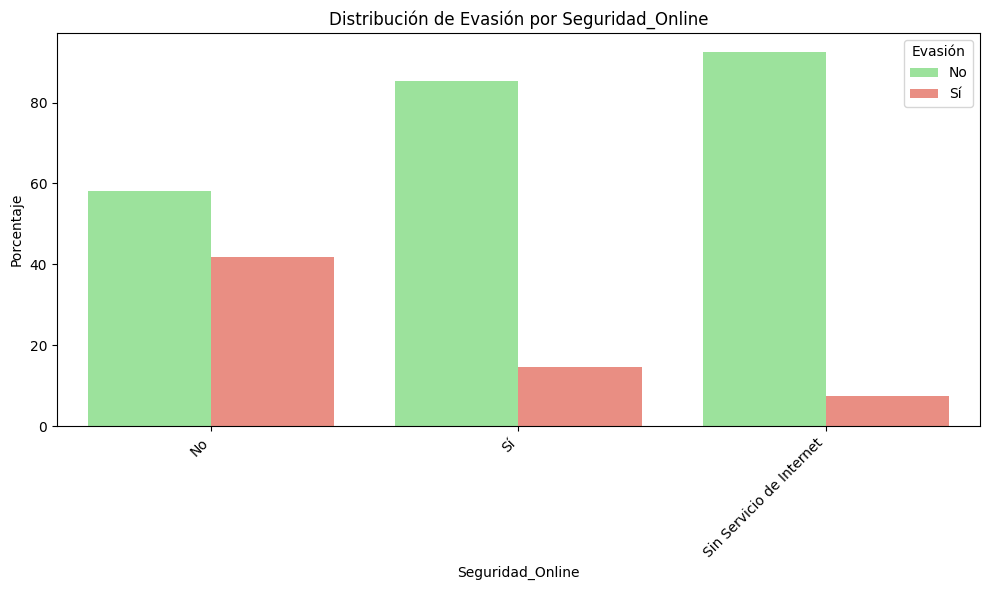


Porcentaje de Evasi√≥n por Respaldo_Online:
Churn                            No         S√≠
Respaldo_Online                               
No                        60.071244  39.928756
Sin Servicio de Internet  92.595020   7.404980
S√≠                        78.468506  21.531494


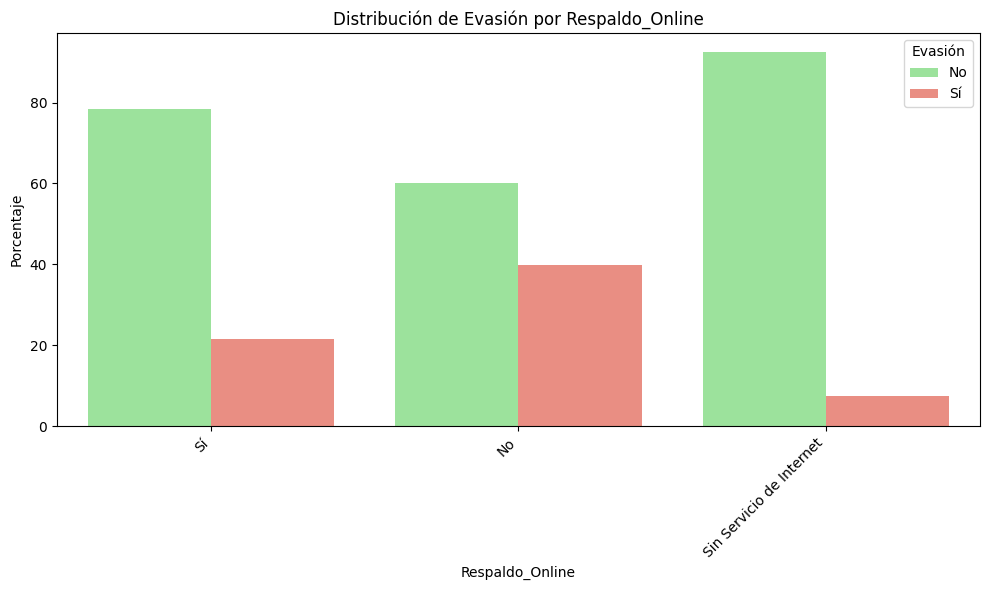


Porcentaje de Evasi√≥n por Proteccion_Dispositivo:
Churn                            No         S√≠
Proteccion_Dispositivo                        
No                        60.872375  39.127625
Sin Servicio de Internet  92.595020   7.404980
S√≠                        77.497936  22.502064


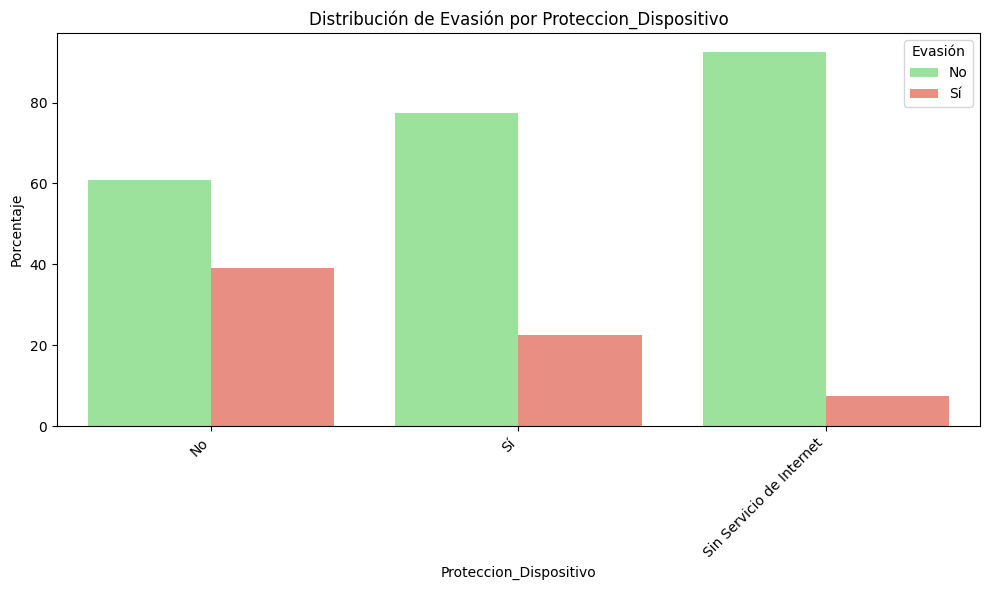


Porcentaje de Evasi√≥n por Soporte_Tecnico:
Churn                            No         S√≠
Soporte_Tecnico                               
No                        58.364526  41.635474
Sin Servicio de Internet  92.595020   7.404980
S√≠                        84.833659  15.166341


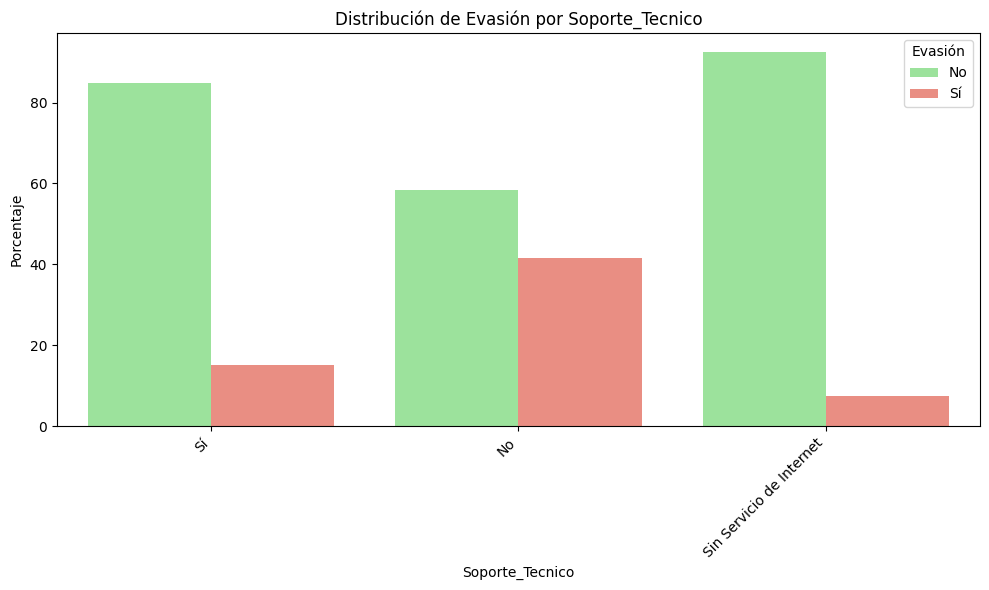


Porcentaje de Evasi√≥n por Streaming_TV:
Churn                            No         S√≠
Streaming_TV                                  
No                        66.476868  33.523132
Sin Servicio de Internet  92.595020   7.404980
S√≠                        69.929812  30.070188


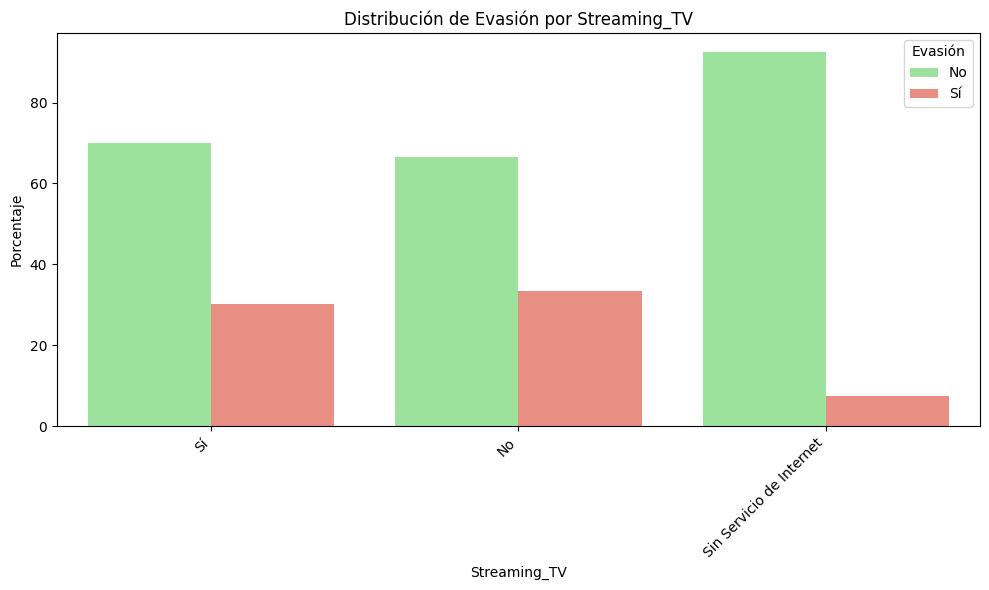


Porcentaje de Evasi√≥n por Streaming_Peliculas:
Churn                            No         S√≠
Streaming_Peliculas                           
No                        66.319569  33.680431
Sin Servicio de Internet  92.595020   7.404980
S√≠                        70.058565  29.941435


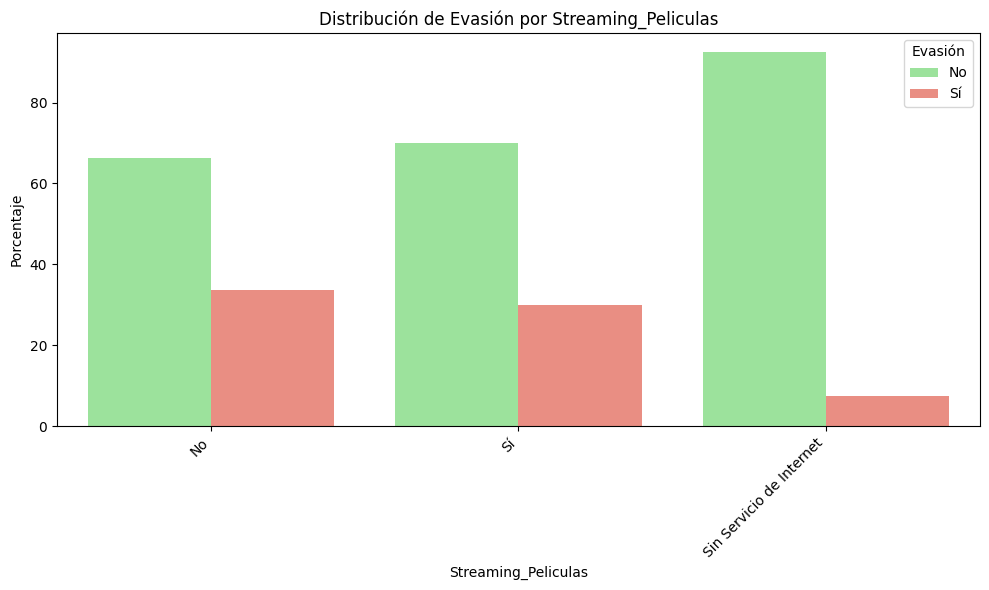


Porcentaje de Evasi√≥n por Tipo_Contrato:
Churn                 No         S√≠
Tipo_Contrato                      
Dos A√±os       97.168142   2.831858
Mes a Mes      57.290323  42.709677
Un A√±o         88.730482  11.269518


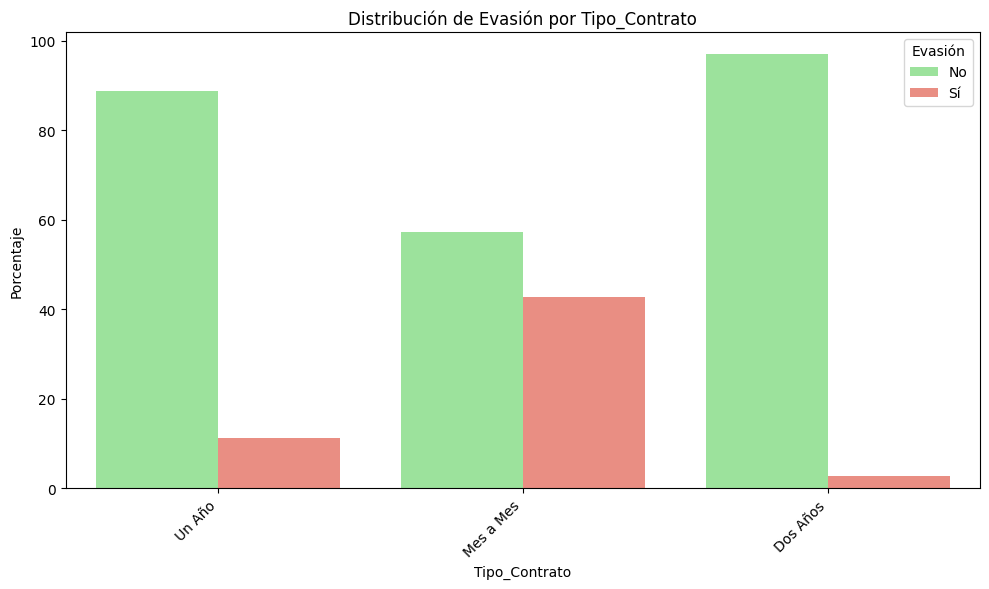


Porcentaje de Evasi√≥n por Facturacion_Electronica:
Churn                           No         S√≠
Facturacion_Electronica                      
No                       83.669916  16.330084
S√≠                       66.434908  33.565092


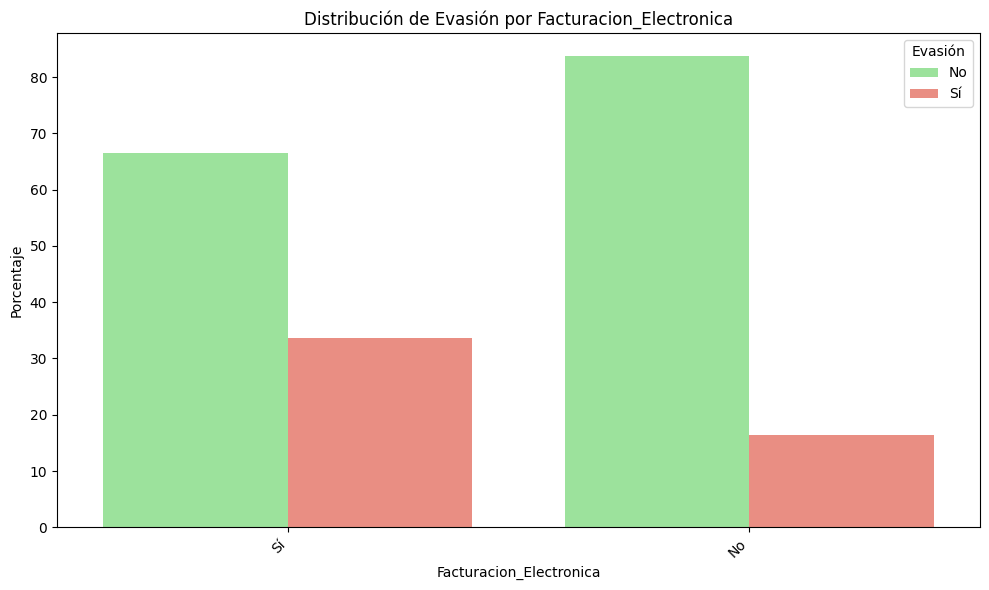


Porcentaje de Evasi√≥n por Metodo_Pago:
Churn                                       No         S√≠
Metodo_Pago                                              
Cheque Electr√≥nico                   54.714588  45.285412
Cheque por Correo                    80.893300  19.106700
Tarjeta de Cr√©dito (Autom√°tica)      84.756899  15.243101
Transferencia Bancaria (Autom√°tica)  83.290155  16.709845


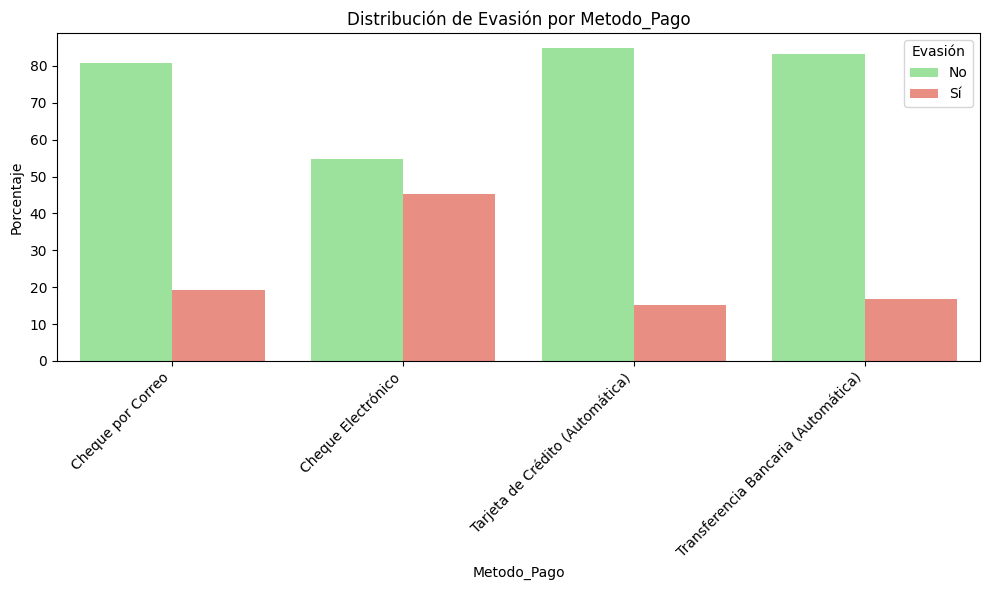

In [53]:
# --- 6. Distribuci√≥n de la Evasi√≥n por Variables Categ√≥ricas ---
print("\n--- Distribuci√≥n de la Evasi√≥n por Variables Categ√≥ricas ---")


df_final_cleaned = df_final[df_final['Churn'] != ''].copy()


df_final_cleaned['Churn'] = df_final_cleaned['Churn'].map({'Yes': 'S√≠', 'No': 'No'})


variables_categoricas_para_churn = [
    'Genero', 'Adulto_Mayor', 'Pareja', 'Dependientes', 'Servicio_Telefonico',
    'Multiples_Lineas', 'Servicio_Internet', 'Seguridad_Online', 'Respaldo_Online',
    'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas',
    'Tipo_Contrato', 'Facturacion_Electronica', 'Metodo_Pago'
]

for col in variables_categoricas_para_churn:

    churn_por_categoria = df_final_cleaned.groupby(col)['Churn'].value_counts(normalize=True).unstack().mul(100).fillna(0)


    if 'No' not in churn_por_categoria.columns:
        churn_por_categoria['No'] = 0
    if 'S√≠' not in churn_por_categoria.columns:
        churn_por_categoria['S√≠'] = 0


    churn_por_categoria = churn_por_categoria[['No', 'S√≠']]


    print(f"\nPorcentaje de Evasi√≥n por {col}:")
    print(churn_por_categoria)


    if not churn_por_categoria.empty:

        plt.figure(figsize=(10, 6))


        data_for_plot = churn_por_categoria.reset_index().melt(id_vars=col, var_name='Evasi√≥n', value_name='Porcentaje')


        order_x = df_final_cleaned[col].unique()

        order_x = [x for x in order_x if pd.notna(x)]


        ax = sns.barplot(data=data_for_plot,
                         x=col, y='Porcentaje', hue='Evasi√≥n', palette=['lightgreen', 'salmon'],
                         order=order_x)

        plt.title(f'Distribuci√≥n de Evasi√≥n por {col}')
        plt.xlabel(col)
        plt.ylabel('Porcentaje')
        plt.xticks(rotation=45, ha='right')


        plt.tight_layout()
        plt.show()
    else:
        print(f"Advertencia: No hay datos para graficar para la columna '{col}' despu√©s del procesamiento.")

**Distribuci√≥n del Churn por variables num√©ricas**


--- 7. Distribuci√≥n de Variables Num√©ricas seg√∫n 'Churn' (Evasi√≥n) ---


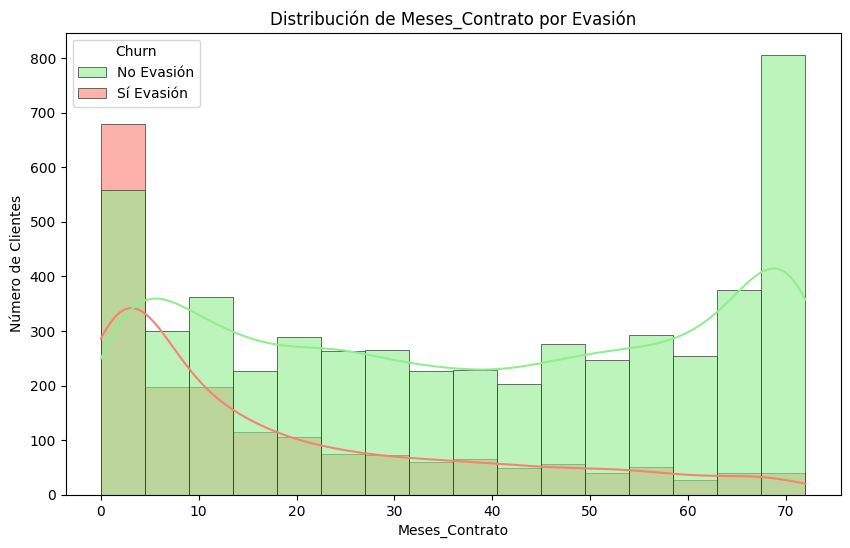

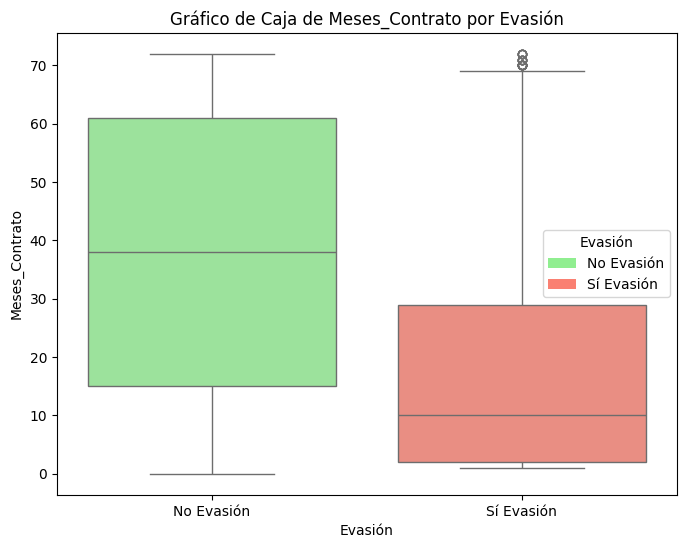


Estad√≠sticas descriptivas para Meses_Contrato por Evasi√≥n:
        count       mean        std  min   25%   50%   75%   max
Churn                                                           
No     5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0
Yes    1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0


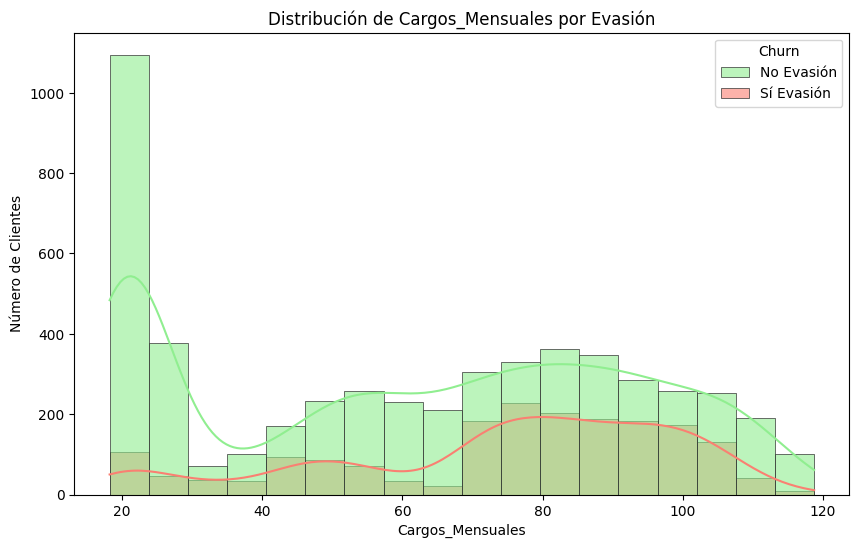

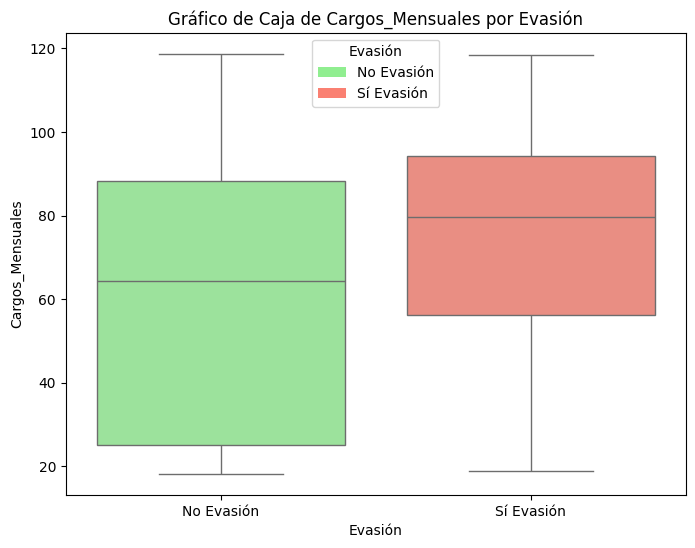


Estad√≠sticas descriptivas para Cargos_Mensuales por Evasi√≥n:
        count       mean        std    min    25%     50%   75%     max
Churn                                                                  
No     5174.0  61.265124  31.092648  18.25  25.10  64.425  88.4  118.75
Yes    1869.0  74.441332  24.666053  18.85  56.15  79.650  94.2  118.35


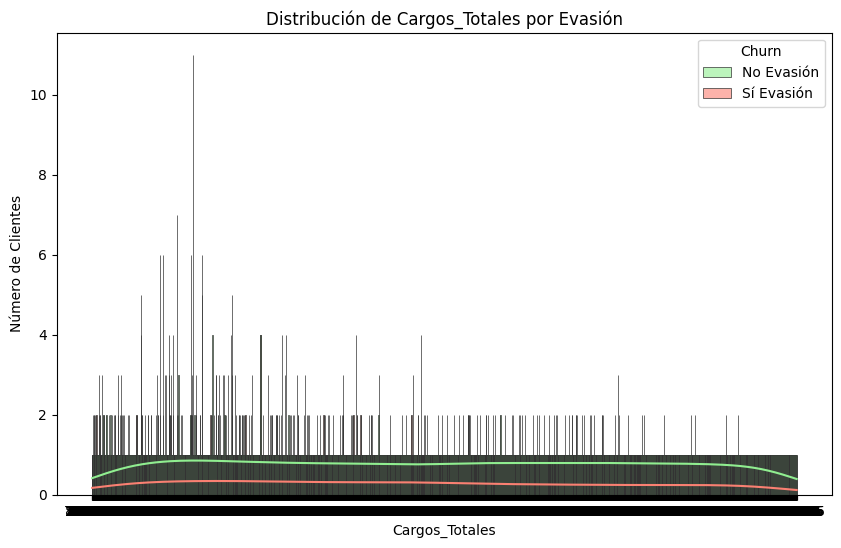

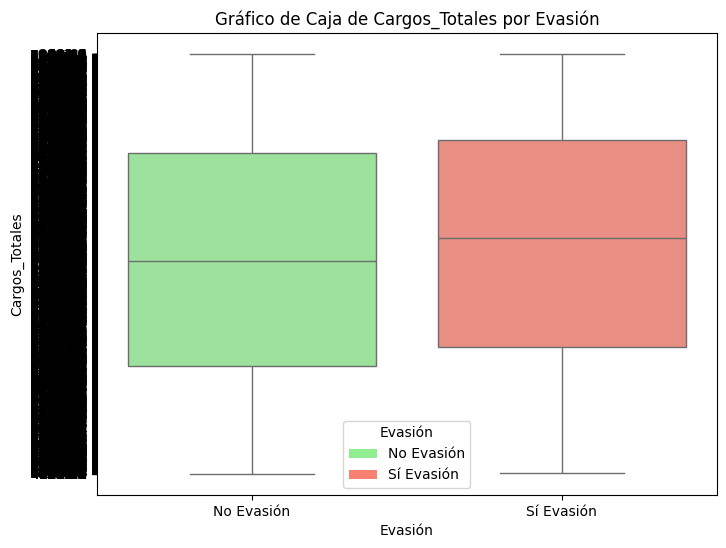


Estad√≠sticas descriptivas para Cargos_Totales por Evasi√≥n:
      count unique   top freq
Churn                        
No     5174   4966         11
Yes    1869   1732  20.2    6


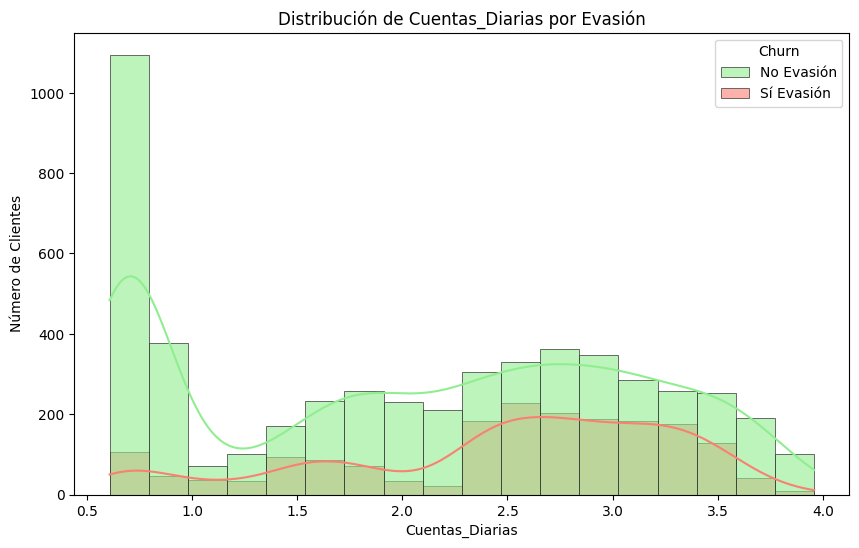

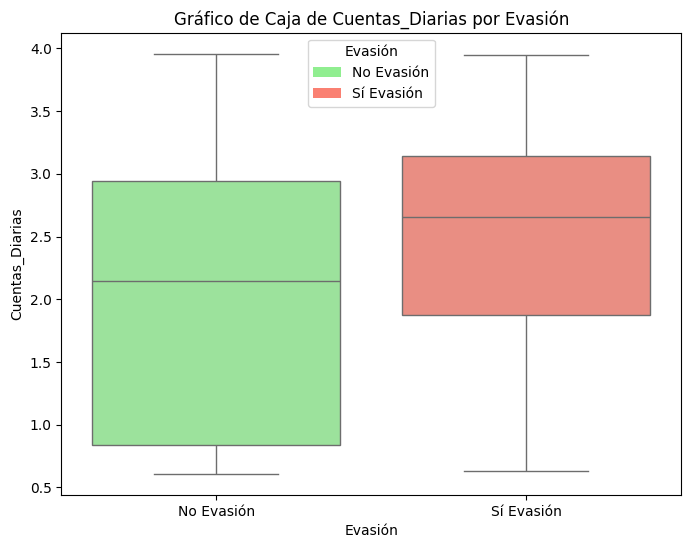


Estad√≠sticas descriptivas para Cuentas_Diarias por Evasi√≥n:
        count      mean       std       min       25%     50%       75%  \
Churn                                                                     
No     5174.0  2.042171  1.036422  0.608333  0.836667  2.1475  2.946667   
Yes    1869.0  2.481378  0.822202  0.628333  1.871667  2.6550  3.140000   

            max  
Churn            
No     3.958333  
Yes    3.945000  


In [55]:
# --- 7. Distribuci√≥n de Variables Num√©ricas seg√∫n "Churn" (Evasi√≥n) ---
print("\n--- 7. Distribuci√≥n de Variables Num√©ricas seg√∫n 'Churn' (Evasi√≥n) ---")


df_final_cleaned = df_final[df_final['Churn'] != ''].copy()


dias_en_mes = 30
df_final_cleaned['Cuentas_Diarias'] = df_final_cleaned['Cargos_Mensuales'] / dias_en_mes


variables_numericas_para_churn = ['Meses_Contrato', 'Cargos_Mensuales', 'Cargos_Totales', 'Cuentas_Diarias']


churn_colors = ['lightgreen', 'salmon'] # Assuming 'No' is lightgreen and 'Yes' is salmon based on previous plots


translated_churn_labels = {'No': 'No Evasi√≥n', 'Yes': 'S√≠ Evasi√≥n'}

for col in variables_numericas_para_churn:

    plt.figure(figsize=(10, 6))

    sns.histplot(data=df_final_cleaned.replace({'Churn': translated_churn_labels}), x=col, hue='Churn', kde=True, palette=churn_colors,
                 alpha=0.6, linewidth=0.5, edgecolor=".2")
    plt.title(f'Distribuci√≥n de {col} por Evasi√≥n')
    plt.xlabel(col)
    plt.ylabel('N√∫mero de Clientes')

    plt.show()


    plt.figure(figsize=(8, 6))

    ax = sns.boxplot(data=df_final_cleaned.replace({'Churn': translated_churn_labels}), x='Churn', y=col, hue='Churn', palette=churn_colors)
    plt.title(f'Gr√°fico de Caja de {col} por Evasi√≥n')
    plt.xlabel('Evasi√≥n')
    plt.ylabel(col)


    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor=churn_colors[0], label='No Evasi√≥n'),
                       Patch(facecolor=churn_colors[1], label='S√≠ Evasi√≥n')]
    ax.legend(handles=legend_elements, title='Evasi√≥n')

    plt.show()

    print(f"\nEstad√≠sticas descriptivas para {col} por Evasi√≥n:")
    # Group by the original 'Churn' values for describe, as the translated values are only for plotting
    print(df_final_cleaned.groupby('Churn')[col].describe())




# ‚Ñπ **Informe Final del An√°lisis de Evasi√≥n de Clientes (Churn)**



## **üîπ Introducci√≥n**

El presente informe tiene como objetivo principal explorar y comprender los factores que contribuyen a la evasi√≥n de clientes (Churn) en una empresa de telecomunicaciones. La evasi√≥n de clientes representa un desaf√≠o significativo para cualquier negocio, ya que la adquisici√≥n de nuevos clientes suele ser m√°s costosa que la retenci√≥n de los existentes. Al identificar patrones y tendencias en los datos de los clientes, buscamos obtener insights valiosos que permitan desarrollar estrategias efectivas para reducir la tasa de Churn y mejorar la lealtad del cliente. El an√°lisis se centra en un conjunto de datos que contiene informaci√≥n demogr√°fica, servicios contratados y detalles de cuenta de los clientes, incluyendo su estado de "Churn" (si el cliente cancel√≥ o no su servicio).


## üîπ **Limpieza y Tratamiento de Datos**

La calidad de los datos es fundamental para cualquier an√°lisis. Los pasos de limpieza y preprocesamiento realizados fueron los siguientes:


**Carga e Importaci√≥n:** Se import√≥ el archivo TelecomX_Data.json, que conten√≠a datos anidados en formato JSON.


**Normalizaci√≥n de JSON:** Los campos anidados (customer, phone, internet, account) se normalizaron en DataFrames planos separados utilizando pd.json_normalize() para facilitar su manipulaci√≥n.


**Correcci√≥n de √çndices y Concatenaci√≥n:** Se identific√≥ un problema potencial de alineaci√≥n debido a los √≠ndices. Para garantizar la correcta fusi√≥n de los datos, los √≠ndices de todos los DataFrames normalizados (y el DataFrame base df_crudo[['customerID', 'Churn']]) se resetearon con reset_index(drop=True) antes de ser concatenados horizontalmente (axis=1) en un √∫nico DataFrame final (df_final).


**Renombrado de Columnas:** Todos los nombres de las columnas se tradujeron del ingl√©s al espa√±ol para una mayor claridad y consistencia en el an√°lisis. Ejemplos: gender a Genero, tenure a Meses_Contrato, Charges.Monthly a Cargos_Mensuales, etc.


**Tratamiento de Cargos_Totales:**
La columna Cargos_Totales se convirti√≥ a tipo num√©rico, forzando los errores a NaN (errors='coerce') para manejar valores no num√©ricos.
Se observ√≥ que los clientes con Meses_Contrato igual a 0 (clientes nuevos sin historial de cargos) ten√≠an Cargos_Totales como cadenas vac√≠as, resultando en NaN tras la conversi√≥n. Estos NaN se imputaron a 0 para reflejar correctamente la ausencia de cargos totales en estos casos.


**Eliminaci√≥n de Filas con NaN:** Se eliminaron las filas que a√∫n conten√≠an valores NaN en las columnas cr√≠ticas Cargos_Totales y Churn, asegurando que el an√°lisis se realizara sobre un conjunto de datos completo y v√°lido.
Creaci√≥n de Nueva Caracter√≠stica: Se cre√≥ una nueva columna Cuentas_Diarias dividiendo Cargos_Mensuales por 30 (d√≠as en un mes), para una perspectiva diaria del gasto.


**Traducci√≥n de Valores Categ√≥ricos:** Se tradujeron los valores dentro de las columnas categ√≥ricas (ej. 'Yes'/'No' a 'S√≠'/'No', 'Female'/'Male' a 'Femenino'/'Masculino', tipos de contrato, m√©todos de pago, etc.) a sus equivalentes en espa√±ol. Esto es crucial para la legibilidad de los gr√°ficos y tablas. Se realizaron las siguientes traducciones:
Churn: 'Yes' a 'S√≠', 'No' a 'No'.
Genero: 'Female' a 'Femenino', 'Male' a 'Masculino'.
Adulto_Mayor: 0 a 'No', 1 a 'S√≠'.
Columnas binarias (Pareja, Dependientes, Servicio_Telefonico, Facturacion_Electronica): 'Yes' a 'S√≠', 'No' a 'No'.
Columnas de servicio (Multiples_Lineas, Seguridad_Online, Respaldo_Online, Proteccion_Dispositivo, Soporte_Tecnico, Streaming_TV, Streaming_Peliculas): Manejo de 'No phone service'/'No internet service', 'Yes' a 'S√≠', 'No' a 'No'.
Tipo_Contrato: 'Month-to-month' a 'Mes a Mes', 'One year' a 'Un A√±o', 'Two year' a 'Dos A√±os'.
Metodo_Pago: Traducci√≥n de los cuatro m√©todos de pago al espa√±ol.
Servicio_Internet: 'DSL', 'Fiber optic' a 'Fibra √ìptica', 'No' a 'Sin Servicio de Internet'.

##üîπ **An√°lisis Exploratorio de Datos**

Se realizaron an√°lisis y visualizaciones exhaustivos para identificar patrones en la evasi√≥n de clientes.

üí° **Distribuci√≥n General de la Evasi√≥n:** La distribuci√≥n de la variable 'Churn' revel√≥ que un porcentaje significativo de clientes ha evadido.

üí° **Conteo de Churn:** La mayor√≠a de los clientes no evadieron, pero una parte considerable s√≠ lo hizo.

üí° **Porcentaje de Churn:** Se observ√≥ que aproximadamente el 26.5% de los clientes evadi√≥ (S√≠), mientras que el 73.5% no evadi√≥ (No). Esta desproporci√≥n es com√∫n en problemas de clasificaci√≥n de Churn.

üí° **Distribuci√≥n de la Evasi√≥n por Variables Categ√≥ricas:** Se analizaron diversas variables categ√≥ricas en relaci√≥n con la evasi√≥n, presentando los siguientes hallazgos clave:

**1.- G√©nero (Genero):** No se observ√≥ una diferencia significativa en la tasa de evasi√≥n entre clientes femeninos y masculinos.

**2.-Adulto Mayor (Adulto_Mayor):** Los clientes clasificados como adultos mayores (S√≠) mostraron una tasa de evasi√≥n notablemente m√°s alta que los no adultos mayores.

**3.- Pareja (Pareja) y Dependientes (Dependientes):** Los clientes que no tienen pareja o dependientes mostraron una mayor propensi√≥n a evadir, sugiriendo que aquellos con lazos familiares son m√°s estables.

**4.- Servicio Telef√≥nico (Servicio_Telefonico) y M√∫ltiples L√≠neas (Multiples_Lineas):** El servicio telef√≥nico en s√≠ mismo no parece ser un fuerte predictor de evasi√≥n. Sin embargo, los clientes con m√∫ltiples l√≠neas tuvieron una evasi√≥n ligeramente menor que los que no.

**5.- Servicio de Internet (Servicio_Internet):** Los clientes con Fibra √ìptica tienen una tasa de evasi√≥n considerablemente m√°s alta en comparaci√≥n con aquellos con servicio DSL o sin servicio de internet. Esto podr√≠a indicar problemas de calidad, precio o expectativas con el servicio de Fibra √ìptica. Aquellos sin servicio de Internet muestran una tasa de evasi√≥n muy baja, lo que sugiere que son clientes m√°s b√°sicos y menos propensos a cambiar.

**6.- Servicios Adicionales de Internet (Seguridad, Respaldo, Protecci√≥n, Soporte T√©cnico):** Los clientes que no tienen servicios adicionales como Seguridad Online, Respaldo Online, Protecci√≥n de Dispositivo o especialmente Soporte T√©cnico mostraron tasas de evasi√≥n significativamente m√°s altas. Esto subraya la importancia de estos servicios para la retenci√≥n.

**7.- Servicios de Streaming (Streaming_TV, Streaming_Peliculas):** Los clientes que utilizan servicios de streaming de la compa√±√≠a (TV y Pel√≠culas) mostraron tasas de evasi√≥n ligeramente m√°s bajas, lo que indica que estos servicios pueden a√±adir valor y contribuir a la retenci√≥n.

**8.- Tipo de Contrato (Tipo_Contrato):** Este es uno de los predictores m√°s fuertes. Los clientes con contratos "Mes a Mes" tienen una tasa de evasi√≥n dr√°sticamente m√°s alta en comparaci√≥n con los contratos de "Un A√±o" y "Dos A√±os". Los contratos a largo plazo demuestran un compromiso mucho mayor.

**9.- Facturaci√≥n Electr√≥nica (Facturacion_Electronica):** Los clientes que optan por la facturaci√≥n electr√≥nica mostraron una tasa de evasi√≥n ligeramente m√°s alta que aquellos que no lo hacen, lo que podr√≠a indicar que son clientes m√°s "digitales" y posiblemente m√°s propensos a comparar y cambiar de proveedor.

**10.- M√©todo de Pago (Metodo_Pago):** El Cheque Electr√≥nico se asoci√≥ con la tasa de evasi√≥n m√°s alta, mientras que las transferencias bancarias y las tarjetas de cr√©dito autom√°ticas mostraron tasas de evasi√≥n mucho m√°s bajas, lo que sugiere que la comodidad y la automatizaci√≥n del pago est√°n ligadas a una mayor retenci√≥n.

üí° **Distribuci√≥n de Variables Num√©ricas:** seg√∫n Churn El an√°lisis de variables num√©ricas revel√≥ patrones importantes:

**1.- Meses de Contrato (Meses_Contrato):** Los clientes que evaden (S√≠) tienden a tener una permanencia mucho m√°s corta (menos meses de contrato). El histograma mostr√≥ un pico muy pronunciado para los clientes con baja permanencia en el grupo de evasi√≥n. Los clientes que no evaden (No) tienen una distribuci√≥n de permanencia m√°s uniforme, con un gran n√∫mero de clientes con contratos de larga duraci√≥n.

**2.-Cargos Mensuales (Cargos_Mensuales):** Los clientes que evaden (S√≠) tienden a tener cargos mensuales m√°s altos en promedio. Se observ√≥ que aquellos con tarifas mensuales elevadas, especialmente entre 70 y 100, son m√°s propensos a evadir. Los clientes que no evaden (No) muestran una distribuci√≥n m√°s bimodal, con picos en tarifas bajas y altas, pero con una proporci√≥n menor de evasi√≥n en las tarifas muy altas.

**3.-Cargos Totales (Cargos_Totales):** Los clientes que evaden (S√≠) generalmente tienen cargos totales mucho m√°s bajos. Esto es coherente con su menor Meses_Contrato. Un cliente que ha gastado poco en total es m√°s propenso a irse. Los clientes que no evaden (No) muestran una distribuci√≥n de cargos totales sesgada hacia valores m√°s altos, lo que indica una relaci√≥n a largo plazo con la empresa.

**4.-Cuentas Diarias (Cuentas_Diarias):** Similar a los cargos mensuales, los clientes que evaden tienden a tener un gasto diario promedio m√°s alto.

## üîπ **Conclusiones e Insights**

De este an√°lisis, podemos extraer las siguientes conclusiones clave:

**1.- Los clientes nuevos o con poca antig√ºedad (pocos Meses_Contrato)** son los m√°s vulnerables a la evasi√≥n.

**2.- Los clientes con contratos "Mes a Mes"** son un segmento de muy alto riesgo de Churn.

**3.-La experiencia con el servicio de internet (especialmente Fibra √ìptica) y la falta de servicios de seguridad y soporte t√©cnico** son factores cr√≠ticos para la evasi√≥n. Los clientes que carecen de estos servicios adicionales son m√°s propensos a irse.

**4.-Los clientes con altos cargos mensuales pero bajos cargos totales (indicando una combinaci√≥n de tarifas elevadas y poca permanencia)** son propensos a evadir. Esto sugiere que no perciben el valor adecuado por su gasto.

**5.-El m√©todo de pago "Cheque Electr√≥nico"** est√° fuertemente asociado con la evasi√≥n, mientras que los pagos autom√°ticos (transferencia bancaria, tarjeta de cr√©dito) fomentan la retenci√≥n.

**6.-Los adultos mayores y los clientes sin pareja o dependientes** son segmentos con mayor riesgo de Churn. En resumen, la evasi√≥n est√° impulsada por una combinaci√≥n de falta de compromiso a largo plazo, percepci√≥n de valor inadecuado para el precio, y ausencia de servicios de valor a√±adido o soporte.





## üîπ **Recomendaciones**

Basado en los hallazgos anteriores, se proponen las siguientes recomendaciones estrat√©gicas para reducir la evasi√≥n de clientes:

**1.-Programas de Fidelizaci√≥n para Clientes Nuevos:** Implementar programas de bienvenida y seguimiento intensivo durante los primeros 3-6 meses de contrato (Meses_Contrato bajo), ofreciendo soporte proactivo y asegurando la satisfacci√≥n inicial.

**2.-Incentivar Contratos a Largo Plazo:** Ofrecer descuentos significativos o beneficios adicionales por cambiar de un contrato "Mes a Mes" a uno de "Un A√±o" o "Dos A√±os". Comunicar claramente los beneficios y ahorros de los contratos a largo plazo.

**3.-Mejorar la Experiencia de Fibra √ìptica:**

  -Investigar las causas de alta evasi√≥n en Fibra √ìptica (problemas de velocidad, fiabilidad, atenci√≥n al cliente).

  -Implementar monitoreo proactivo de la red y encuestas de satisfacci√≥n espec√≠ficas para usuarios de Fibra √ìptica.
  
  -Considerar ofrecer un "Per√≠odo de Prueba" para Fibra √ìptica con opci√≥n de cambio flexible si no est√°n satisfechos.
  
**4.-Promoci√≥n de Servicios Adicionales y Soporte T√©cnico:** Destacar el valor de Seguridad_Online, Respaldo_Online, Proteccion_Dispositivo y Soporte_Tecnico.

  -Ofrecer paquetes de servicios que incluyan estos adicionales a un precio atractivo, especialmente para clientes que actualmente no los tienen.
  
  -Fortalecer el servicio de soporte t√©cnico para reducir la fricci√≥n y mejorar la experiencia del cliente.
  
**5.-Optimizaci√≥n de la Estructura de Cargos:** Evaluar si los Cargos_Mensuales son percibidos como demasiado altos en relaci√≥n con los servicios recibidos, especialmente para clientes con baja permanencia. Considerar opciones de planes m√°s flexibles o econ√≥micos para atraer y retener clientes sensibles al precio.

**6.-Fomentar M√©todos de Pago Autom√°ticos:** Promocionar activamente la Transferencia Bancaria (Autom√°tica) y la Tarjeta de Cr√©dito (Autom√°tica) con incentivos (peque√±os descuentos o beneficios) para reducir la dependencia del Cheque Electr√≥nico.
  -Mejorar la experiencia y la comunicaci√≥n alrededor de los m√©todos de pago autom√°ticos para generar confianza.
  
**7.-Segmentaci√≥n y Ofertas Personalizadas:** Desarrollar campa√±as de retenci√≥n espec√≠ficas para Adulto_Mayor y clientes Sin Pareja/Dependientes, ya que tienen un perfil de riesgo m√°s alto. Estas ofertas podr√≠an enfocarse en servicios que valoren m√°s (ej. soporte t√©cnico f√°cil, planes de voz simples).


Al implementar estas recomendaciones, la empresa estar√° mejor equipada para comprender y mitigar los factores de evasi√≥n, lo que resultar√° en una mayor retenci√≥n de clientes y un crecimiento m√°s sostenible.